In [51]:
import pickle
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [52]:
obsGLI = None
with open('obsgli.json') as f:
    obsGLI = json.load(f)

obsGold = None
with open('obs.json') as f:
    obsGold = json.load(f)

resGLI = None
with open('resgli.json') as f:
    resGLI = json.load(f)

resGold = None
with open('res.json') as f:
    resGold = json.load(f)

In [53]:
modelObsGLI = pickle.load(open('modelObsGLI.pkl', 'rb'))
modelObsGLIClassification = pickle.load(open('modelObsClassificationGLI.pkl', 'rb'))
modelResGLI = pickle.load(open('modelResGLI.pkl', 'rb'))
modelObsGold = pickle.load(open('modelObsGold.pkl', 'rb'))
modelResGold = pickle.load(open('modelResGold.pkl', 'rb'))

## Obstruction

### GLI

##### Normal

In [54]:
obsGLICopy = obsGLI.copy()

xObs = []
yObs = []
for item in obsGLICopy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [55]:
mean_squared_error(yObsVal, modelObsGLI.predict(pd.DataFrame(xObsVal))) ** 1/2

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


0.3224055063386555

##### Classification

In [56]:
def n_acurracy(m, dX, dY, n=1):
    l = m.predict(pd.DataFrame(dX)).tolist()
    s = 0

    for p in l:
        for i in range(len(p)):
            p[i] = (p[i], i)
        p.sort(reverse=True)

    print(l)

    for i in range(n):
        for j in range(len(dX)):
            if dY[j] == l[j][i][1]:
                s += 1

    return s / len(dX)

In [57]:
obsGLICopy = obsGLI.copy()

xObs = []
yObs = []
for item in obsGLICopy:
    yObs.append(item['Obstruction'])
    del item['Obstruction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

KeyError: 'Obstruction'

In [ ]:
print(n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain))
print(n_acurracy(modelObsGLIClassification, xObsTrain, yObsTrain, 2))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
[[(0.8969656229019165, 0), (0.05347737669944763, 3), (0.03989486023783684, 4), (0.005896675866097212, 2), (0.0037654745392501354, 1)], [(0.9292342066764832, 0), (0.03781271353363991, 3), (0.027963856235146523, 4), (0.003363541094586253, 2), (0.0016257042298093438, 1)], [(0.8870944380760193, 0), (0.039372872561216354, 1), (0.0350603386759758, 4), (0.02146766521036625, 3), (0.017004717141389847, 2)], [(0.531423807144165, 1), (0.36489635705947876, 0), (0.044207196682691574, 3), (0.04121094569563866, 2), (0.01826169155538082, 4)], [(0.9210982918739319, 0), (0.040896471589803696, 4), (0.015280487947165966, 3), (0.013756769709289074, 1), (0.008967844769358635, 2)], [(0.902458131313324, 0), (0.045519113540649414, 3), (0.042046744376420975, 4), (0.006000119261443615, 2), (0.003975813277065754, 1)], [(0.9270883798599243, 0), (0.03869898244738579, 4), (0.026834851130843163, 3), (0.004111599642783403, 2), (0.003266208805143833, 1)], [(0.9077026844024658, 0),

### Gold

In [ ]:
obsGoldCopy = obsGold.copy()

xObs = []
yObs = []
for item in obsGoldCopy:
    yObs.append(obsGoldCopy[item]['obstruction'])
    del obsGoldCopy[item]['obstruction']
    xObs.append(list(obsGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

In [ ]:
mean_squared_error(yObsVal, modelObsGold.predict(pd.DataFrame(xObsVal))) ** 1/2

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


0.36893167646332015

## Restriction

### GLI

In [ ]:
resGLICopy = resGLI.copy()

xObs = []
yObs = []
for item in resGLICopy:
    yObs.append(item['Restriction'])
    del item['Restriction']
    xObs.append(list(item.values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

0.9629629629629629
[[44  0]
 [ 2  8]]


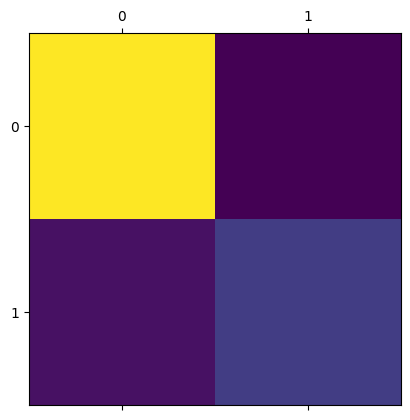

In [ ]:
print(accuracy_score(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGLI.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)

### Gold

In [ ]:
resGoldCopy = resGold.copy()

xObs = []
yObs = []
for item in resGoldCopy:
    yObs.append(resGoldCopy[item]['restriction'])
    del resGoldCopy[item]['restriction']
    xObs.append(list(resGoldCopy[item].values()))

xObsTrain, xObsVal, yObsTrain, yObsVal = train_test_split(xObs, yObs, test_size=0.25, random_state=42)

0.7553516819571865
[[245  78]
 [  2   2]]


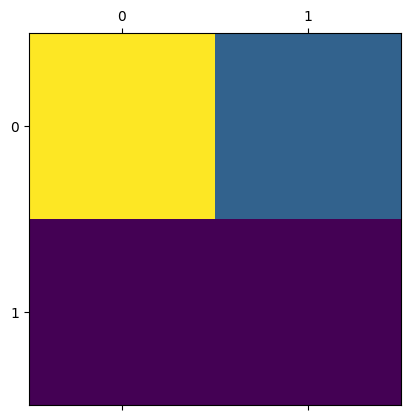

In [ ]:
print(accuracy_score(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal))))
matrix = confusion_matrix(yObsVal, modelResGold.predict(pd.DataFrame(xObsVal)))

print(matrix)
plt.matshow(matrix)